In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

# Download data
data = yf.download('SPY', start='2015-12-01', end='2018-01-31')
data = data[['Close']]  # Keep only 'Close' prices

# Train-test split
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# ARIMA Model
arima_model = ARIMA(data['Close'], order=(1, 1, 1))
arima_results = arima_model.fit()
arima_predictions = arima_results.predict(start=len(train_data), end=len(data)-1, typ='levels')
test_data['ARIMA_Predictions'] = arima_predictions
mae_arima = mean_absolute_error(test_data['Close'], test_data['ARIMA_Predictions'])
print(f"ARIMA MAE: {mae_arima:.4f}")

# Scale data for neural networks
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 20
X, y = create_sequences(scaled_data, seq_length)
X_train, y_train = X[:train_size-seq_length], y[:train_size-seq_length]
X_test, y_test = X[train_size-seq_length:], y[train_size-seq_length:]

# LSTM Model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)
lstm_predictions = model_lstm.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
mae_lstm = mean_absolute_error(actual_prices, lstm_predictions)
print(f"LSTM MAE: {mae_lstm:.4f}")

# RNN Model
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)
rnn_predictions = model_rnn.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
mae_rnn = mean_absolute_error(actual_prices, rnn_predictions)
print(f"RNN MAE: {mae_rnn:.4f}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-1-5775b034da07>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

ARIMA MAE: 0.7290


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0114
Epoch 2/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 0.0013
Epoch 3/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 7.6076e-04
Epoch 4/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 5.9532e-04
Epoch 5/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 9.9417e-04
Epoch 6/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 5.5506e-04
Epoch 7/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 5.8628e-04
Epoch 8/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4.8355e-04
Epoch 9/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 4.9402e-04
Epoch 10/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 5.1219e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
LSTM MAE: 0.9675
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0344 - val_loss: 0.0041
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - val_loss: 8.6796e-04
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5168e-04 - val_loss: 1.6483e-04
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7574e-04 - val_loss: 1.6033e-04
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6678e-04 - val_loss: 1.5950e-04
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0911e-04 - val_loss: 1.6742e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.4907e-04 - val_loss: 2.1288e-04
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4780e-04 - val_loss: 1.5248e-04
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.3165e-04 - val_loss: 2.5848e-04
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4145e-04 - val_loss: 2.0054e-04
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6293e-04 - val_loss: 1.6115e-04
Ep

In [2]:
# Prepare meta model training data
# For the training period, we need to get predictions from each model on the training set

# ARIMA predictions on training set
arima_train_pred = arima_results.predict(start=seq_length, end=len(train_data)-1, typ='levels')

# LSTM predictions on training set
lstm_train_pred = model_lstm.predict(X_train)
lstm_train_pred = scaler.inverse_transform(lstm_train_pred)

# RNN predictions on training set
rnn_train_pred = model_rnn.predict(X_train)
rnn_train_pred = scaler.inverse_transform(rnn_train_pred)

# Actual values for training meta model
y_train_meta = scaler.inverse_transform(y_train.reshape(-1, 1))

# Create DataFrame for meta model training
meta_train_df = pd.DataFrame({
    'arima': arima_train_pred,
    'lstm': lstm_train_pred.flatten(),
    'rnn': rnn_train_pred.flatten(),
    'actual': y_train_meta.flatten()
})

# Prepare test data for meta model (same as before)
meta_test_df = pd.DataFrame({
    'arima': test_data['ARIMA_Predictions'].values[-len(actual_prices):],
    'lstm': lstm_predictions.flatten(),
    'rnn': rnn_predictions.flatten(),
    'actual': actual_prices.flatten()
})

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [3]:
# Current weighted average approach
weights = {
    'ARIMA': 1 / mae_arima,
    'LSTM': 1 / mae_lstm,
    'RNN': 1 / mae_rnn
}
total_weight = sum(weights.values())
for model in weights:
    weights[model] /= total_weight

ensemble_pred = (
    weights['ARIMA'] * meta_test_df['arima'] +
    weights['LSTM'] * meta_test_df['lstm'] +
    weights['RNN'] * meta_test_df['rnn']
)

mae_weighted_avg = mean_absolute_error(meta_test_df['actual'], ensemble_pred)
print(f"\nWeighted Average Ensemble MAE: {mae_weighted_avg:.4f}")


Weighted Average Ensemble MAE: 0.7489


In [4]:
from sklearn.linear_model import LinearRegression

# Train linear regression meta model
meta_model_lr = LinearRegression()
meta_model_lr.fit(meta_train_df[['arima', 'lstm', 'rnn']], meta_train_df['actual'])

# Predict with linear regression meta model
lr_pred = meta_model_lr.predict(meta_test_df[['arima', 'lstm', 'rnn']])
mae_lr = mean_absolute_error(meta_test_df['actual'], lr_pred)
print(f"Linear Regression Meta Model MAE: {mae_lr:.4f}")

Linear Regression Meta Model MAE: 0.7570


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train random forest meta model
meta_model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
meta_model_rf.fit(meta_train_df[['arima', 'lstm', 'rnn']], meta_train_df['actual'])

# Predict with random forest meta model
rf_pred = meta_model_rf.predict(meta_test_df[['arima', 'lstm', 'rnn']])
mae_rf = mean_absolute_error(meta_test_df['actual'], rf_pred)
print(f"Random Forest Meta Model MAE: {mae_rf:.4f}")

Random Forest Meta Model MAE: 13.4679


In [6]:
from sklearn.ensemble import GradientBoostingRegressor

# Train gradient boosting meta model
meta_model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
meta_model_gb.fit(meta_train_df[['arima', 'lstm', 'rnn']], meta_train_df['actual'])

# Predict with gradient boosting meta model
gb_pred = meta_model_gb.predict(meta_test_df[['arima', 'lstm', 'rnn']])
mae_gb = mean_absolute_error(meta_test_df['actual'], gb_pred)
print(f"Gradient Boosting Meta Model MAE: {mae_gb:.4f}")

Gradient Boosting Meta Model MAE: 13.3908


In [7]:
# Compare all approaches
results_comparison = pd.DataFrame({
    'Model': ['ARIMA', 'LSTM', 'RNN', 'Weighted Average', 'Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_arima, mae_lstm, mae_rnn, mae_weighted_avg, mae_lr, mae_rf, mae_gb]
})

print("\nPerformance Comparison:")
print(results_comparison.sort_values('MAE'))


Performance Comparison:
               Model        MAE
0              ARIMA   0.729032
3   Weighted Average   0.748872
4  Linear Regression   0.756958
2                RNN   0.759679
1               LSTM   0.967457
6  Gradient Boosting  13.390783
5      Random Forest  13.467907


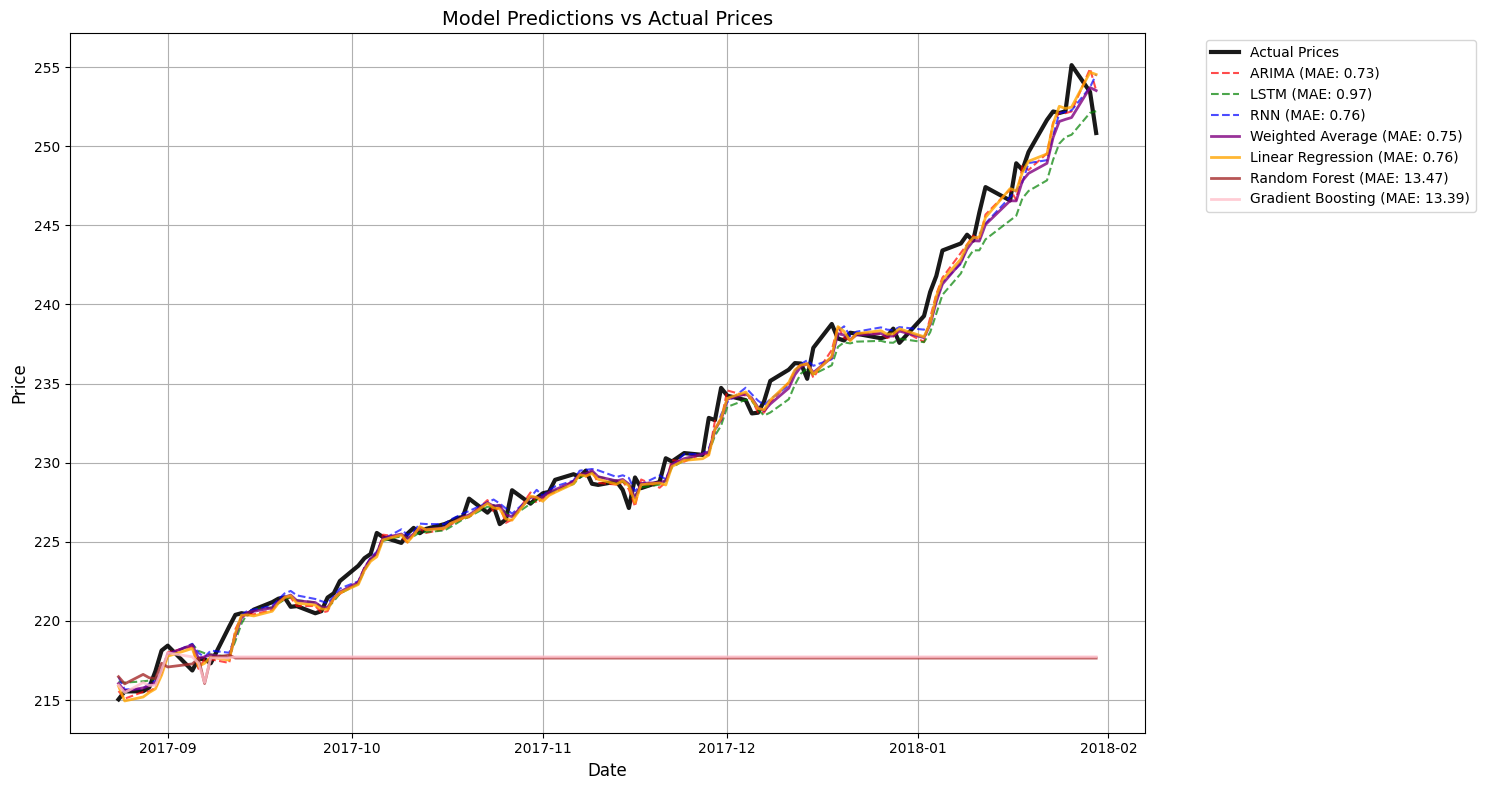

In [8]:
# Plot all predictions
plt.figure(figsize=(15, 8))
plt.plot(test_data.index[-len(actual_prices):], meta_test_df['actual'],
         label='Actual Prices', color='black', linewidth=3, alpha=0.9)

# Plot base models
models = ['arima', 'lstm', 'rnn']
colors = ['red', 'green', 'blue']
for model, color in zip(models, colors):
    plt.plot(test_data.index[-len(actual_prices):], meta_test_df[model],
             label=f'{model.upper()} (MAE: {mean_absolute_error(meta_test_df["actual"], meta_test_df[model]):.2f})',
             linestyle='--', alpha=0.7, color=color)

# Plot meta models
meta_models = {
    'Weighted Average': ensemble_pred,
    'Linear Regression': lr_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred
}
colors = ['purple', 'orange', 'brown', 'pink']
for (name, pred), color in zip(meta_models.items(), colors):
    plt.plot(test_data.index[-len(actual_prices):], pred,
             label=f'{name} (MAE: {mean_absolute_error(meta_test_df["actual"], pred):.2f})',
             linewidth=2, alpha=0.8, color=color)

plt.title('Model Predictions vs Actual Prices', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()